# Did Trump alter his message on migration because of public opininon? 

In [25]:
%cd C:\Users\tenis\OneDrive\Desktop\Data_Projects\presidential_tweets_sentiment_analysis
import pandas as pd  
import numpy as np  
import nltk         
from os import getcwd
from nltk.corpus import twitter_samples 
from utils import process_tweet, build_freqs
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly import version
print (version)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import ipywidgets as widgets
%matplotlib inline 
sns.set_style("whitegrid")

C:\Users\tenis\OneDrive\Desktop\Data_Projects\presidential_tweets_sentiment_analysis
<module 'plotly.version' from 'C:\\Users\\tenis\\anaconda3\\lib\\site-packages\\plotly\\version.py'>


In [26]:
df = pd.read_csv('data/raw/update_trumps_tweets.csv')
df['created_at'] = pd.to_datetime(df['created_at'])


### Regular Sentiment Analysis Scripts

In [27]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

# create frequency dictionary
freqs = build_freqs(train_x, train_y)

def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # calculate the sigmoid of z
    
    h = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return h

def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # get 'm', the number of rows in matrix x
    m = None
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x,theta)
        
        # get the sigmoid of z
        h = 1/(1+np.exp(-z))
        
        # calculate the cost function
        J = float(-1)/len(y) * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(), np.log(1-h)) )
        print(J)

        # update the weights theta
        theta = theta - (alpha/len(y)) * (np.dot(x.transpose(), (h-y)))
        
    ### END CODE HERE ###
    J = float(J)
    return J, theta

def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word,1.0), 0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0), 0)
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)

sentiment = []
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))
    sentiment.append(y_pred)
    
    ### END CODE HERE ###
    
    return y_pred

def sentiment_column(tweets,freqs,theta):
    '''
    Input: 
        process_tweets: column of processed tweets
        
    Output: 
        sentiment_score: a list of sentiment scores
    '''
    #initiatize list for output
    sentiment_score = []
    
    # loop through every tweet and process it 
    for tweet in tweets:
        sentiment = predict_tweet(tweet, freqs, theta)
        sentiment_score.append(sentiment)
        
        
    return sentiment_score


train_y.shape = (8000, 1)
test_y.shape = (2000, 1)
[[0.69314718]]
[[0.69207586]]
[[0.69100784]]
[[0.68994309]]
[[0.68888162]]
[[0.68782341]]
[[0.68676844]]
[[0.68571671]]
[[0.68466821]]
[[0.68362292]]
[[0.68258084]]
[[0.68154194]]
[[0.68050623]]
[[0.67947369]]
[[0.67844431]]
[[0.67741807]]
[[0.67639497]]
[[0.67537499]]
[[0.67435813]]
[[0.67334437]]
[[0.67233371]]
[[0.67132612]]
[[0.6703216]]
[[0.66932014]]
[[0.66832173]]
[[0.66732635]]
[[0.666334]]
[[0.66534467]]
[[0.66435833]]
[[0.66337499]]
[[0.66239463]]
[[0.66141724]]
[[0.66044281]]
[[0.65947133]]
[[0.65850278]]
[[0.65753716]]
[[0.65657446]]
[[0.65561466]]
[[0.65465776]]
[[0.65370374]]
[[0.65275259]]
[[0.6518043]]
[[0.65085887]]
[[0.64991627]]
[[0.64897651]]
[[0.64803956]]
[[0.64710543]]
[[0.64617409]]
[[0.64524553]]
[[0.64431976]]
[[0.64339675]]
[[0.6424765]]
[[0.64155899]]
[[0.64064422]]
[[0.63973217]]
[[0.63882283]]
[[0.6379162]]
[[0.63701227]]
[[0.63611101]]
[[0.63521243]]
[[0.63431652]]
[[0.63342325]]
[[0.63253263]]
[[0.631644

In [28]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 200)
pd.set_option('display.max_colwidth', 100)
sentiment = sentiment_column(tweets= df['text'], freqs=freqs, theta=theta)
df['Sentiment'] = pd.Series(sentiment)
df['Sentiment'] = df['Sentiment'].astype(str)
df['Sentiment'] = df['Sentiment'].str.strip('[]')
df['Sentiment'] = pd.to_numeric(df['Sentiment'], errors='coerce').fillna(0, downcast='infer')
df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,Sentiment
0,Twitter for iPhone,VOTE! VOTE! VOTE!https://t.co/85ySh1KYkh,2020-11-03 07:57:00,170927.0,904092.0,False,1.323530e+18,0.500276
1,Twitter for iPhone,RT @PastorDScott: We need to set all time records in voter turnout tomorrow for President @realD...,2020-11-03 07:31:00,11978.0,0.0,True,1.323530e+18,0.494893
2,Twitter for iPhone,RT @PastorDScott: VOTE TRUMP!!!!!!,2020-11-03 07:30:00,11134.0,0.0,True,1.323530e+18,0.500092
3,Twitter for iPhone,Thank you Matt! https://t.co/hWiyWpvf8o,2020-11-03 07:30:00,16611.0,116716.0,False,1.323530e+18,0.553278
4,Twitter for iPhone,RT @GOP: “Let’s Make America Great Again and re-elect our fantastic president!” -@GOPChairwoman ...,2020-11-03 07:28:00,9644.0,0.0,True,1.323530e+18,0.514029
5,Twitter for iPhone,Thank you Paris. Keep up the GREAT work! https://t.co/jPT046qOTU,2020-11-03 07:28:00,16844.0,119561.0,False,1.323530e+18,0.568259
6,Twitter for iPhone,"RT @camakridis: My new analysis in @TheHillOpinion with @jonjakubowski ""Don't believe the polls ...",2020-11-03 07:02:00,5678.0,0.0,True,1.323520e+18,0.508839
7,Twitter for iPhone,To all of our supporters: thank you from the bottom of my heart. You have been there from the be...,2020-11-03 07:01:00,62742.0,311113.0,False,1.323520e+18,0.567218
8,Twitter for iPhone,Thank you Brad! https://t.co/Rdcp9D76Ol,2020-11-03 07:00:00,7475.0,52399.0,False,1.323520e+18,0.552630
9,Twitter for iPhone,https://t.co/hLuyRy0WNU,2020-11-03 06:42:00,9450.0,62509.0,False,1.323520e+18,0.500000


In [29]:
df.to_csv('data/interim/df_with_basic_sentiment.csv', index=False)

# Overview of trump's twitter sentiments

KeyboardInterrupt: 

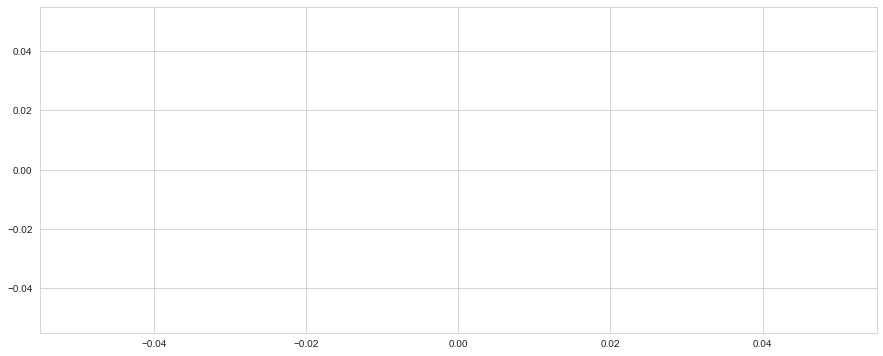

In [60]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(df['created_at'], df['Sentiment'] )

ax.set_title('Trump\'s tweet sentiment over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Sentiment', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

In [ ]:
happy_tweets = df[df['Sentiment'] >= 0.6]
happy_tweets = happy_tweets.sort_values(by = 'Sentiment') 
happy_tweets

In [ ]:
angry_tweets = df[df['Sentiment'] <= .45]
angry_tweets = angry_tweets.sort_values(by = 'Sentiment') 
angry_tweets

# Immigration 

In [7]:
hispanic = df
hispanic['text'] = hispanic['text'].str.lower()
selected_words = ['mexico', 'mexican','mexicans', 'immigrants', 'immigration', 'deportation',
                  'deport', 'latino', 'puerto rico', 'puerto rican', 'puerto ricans', 'cuba', 'cuban',
                  'cubans', 'guatemala','guatemalan', 'guatemalans', 'el salvador', 'salvadoran', 'salvadorans',
                  'honduras', 'honduran', 'hondurans','hispanics', 'hispanic']
#hispanic = df[df['text'].str.contains("mexico")]
hispanic = hispanic[hispanic.text.str.contains('|'.join(selected_words))]
hispanic = hispanic.sort_values(by = 'Sentiment') 
hispanic

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,Sentiment
22144,Twitter for iPhone,....countries which are doing badly. i want a merit based system of immigration and people who w...,2018-01-12 12:09:00,24462.0,110177.0,False,9.517880e+17,0.408397
26955,Twitter for iPhone,i'm a former chief of police in a border town. i'm hispanic i'm proud to be hispanic and i'm 100...,2016-06-03 16:01:00,7991.0,17248.0,False,7.387630e+17,0.425087
15650,Twitter for iPhone,the democrats in congress are getting nothing done not on drug pricing not on immigration not on...,2019-07-17 11:20:00,29932.0,118112.0,False,1.151450e+18,0.433211
20869,Twitter for iPhone,it’s very sad that nancy pelosi and her sidekick cryin’ chuck schumer want to protect illegal im...,2018-06-23 17:05:00,36438.0,150085.0,False,1.010570e+18,0.454034
11319,Twitter for iPhone,....energy independence manufacturing resilience illegal immigration coming down the wall going ...,2019-12-16 05:28:00,9991.0,39683.0,False,1.206450e+18,0.454070
11324,Twitter for iPhone,....energy independence manufacturing resilience illegal immigration coming down the wall going ...,2019-12-16 05:05:00,1289.0,4943.0,False,1.206440e+18,0.454070
20942,Media Studio,i want to take a moment to address the current illegal immigration crisis on the southern border...,2018-06-19 18:04:00,22068.0,82636.0,False,1.009130e+18,0.454942
19892,Twitter for iPhone,3000 people did not die in the two hurricanes that hit puerto rico. when i left the island after...,2018-09-13 12:37:00,20699.0,77663.0,False,1.040220e+18,0.456954
20818,Twitter for iPhone,house republicans should pass the strong but fair immigration bill known as goodlatte ii in thei...,2018-06-27 12:39:00,21991.0,98022.0,False,1.011950e+18,0.457607
18690,Twitter for iPhone,....the united states looses soooo much money on trade with mexico under nafta over 75 billion d...,2018-12-28 12:42:00,23736.0,101103.0,False,1.078630e+18,0.462969


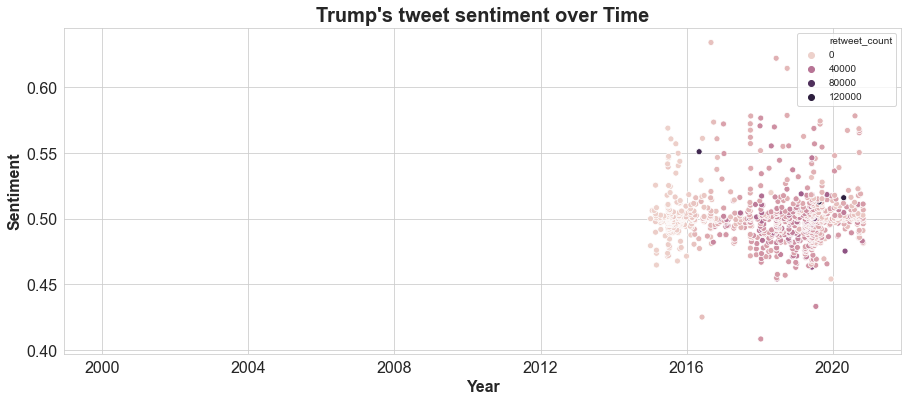

In [78]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(data = hispanic, x ='created_at', y= 'Sentiment', hue='retweet_count')

ax.set_title('Trump\'s tweet sentiment over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Sentiment', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

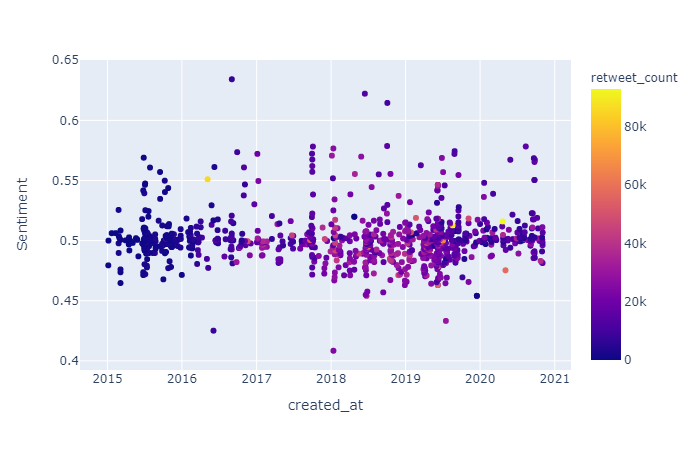

In [21]:
fig = px.scatter(hispanic, x ='created_at', y= 'Sentiment', color='retweet_count',
                hover_data=['text'])
fig.show(renderer="png")
#plotly.offline.plot(fig, filename = ‘plot’)

# China

In [23]:
china = df 
china['text'] = china['text'].str.lower()
china = china[china.text.str.contains('china')]
china


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,Sentiment
17,Twitter for iPhone,a vote for me and the republican party is a vote for the american dream! over the next four year...,2020-11-03 03:37:00,18798.0,97639.0,False,1.323470e+18,0.494363
30,Twitter for iPhone,a vote for joe biden is a vote to extinguish and eradicate your state’s auto industry. biden is ...,2020-11-03 00:40:00,23044.0,112932.0,False,1.323420e+18,0.491398
45,Twitter for iPhone,...he was a cheerleader for nafta and china’s entry into the wto. pennsylvania lost half of its ...,2020-11-02 21:24:00,10675.0,51902.0,False,1.323380e+18,0.489807
50,Twitter for iPhone,i gave maine everything that obama/biden took away from it. 5000 square miles lobster fishing en...,2020-11-02 19:29:00,19401.0,103644.0,False,1.323350e+18,0.485970
60,Twitter for iPhone,biden can never negotiate with china. they would own the u.s. if he were ever president!,2020-11-02 18:26:00,26984.0,167455.0,False,1.323330e+18,0.495886
98,Twitter for iPhone,joe biden is a corrupt politician who is bought and paid for by china! in 2016 georgia voted to ...,2020-11-02 04:15:00,9825.0,47372.0,False,1.323120e+18,0.498270
172,Twitter for iPhone,over the next 4 years we will make america into the manufacturing superpower of the world &amp; ...,2020-10-31 23:52:00,18869.0,86645.0,False,1.322690e+18,0.488071
184,Twitter for iPhone,3 days from now we are going to win pennsylvania! with your support we will continue to bring ba...,2020-10-31 20:56:00,12813.0,54515.0,False,1.322640e+18,0.500196
226,Twitter for iPhone,joe biden is a corrupt politician who has done nothing but betray you for 47 long years - sellin...,2020-10-31 00:29:00,21658.0,87957.0,False,1.322330e+18,0.494162
246,Twitter for iPhone,joe biden is a corrupt politician—the biden family is looking more &amp; more like a crime famil...,2020-10-30 19:10:00,14636.0,61840.0,False,1.322250e+18,0.500259


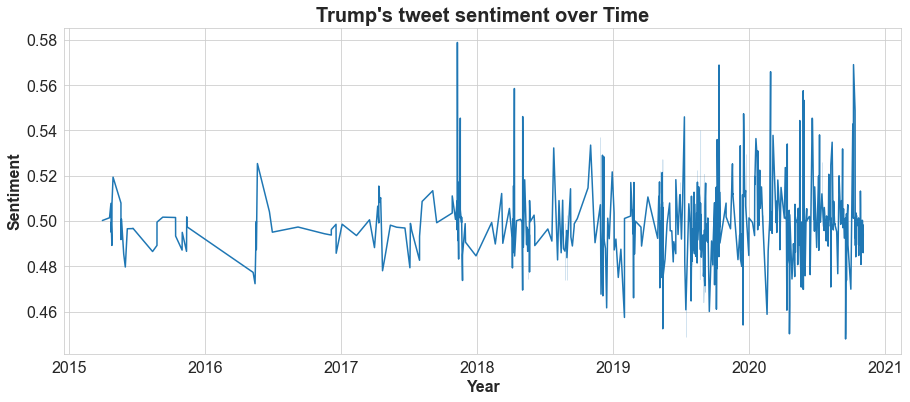

In [68]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(china['created_at'], china['Sentiment'] )

ax.set_title('Trump\'s tweet sentiment over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Sentiment', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

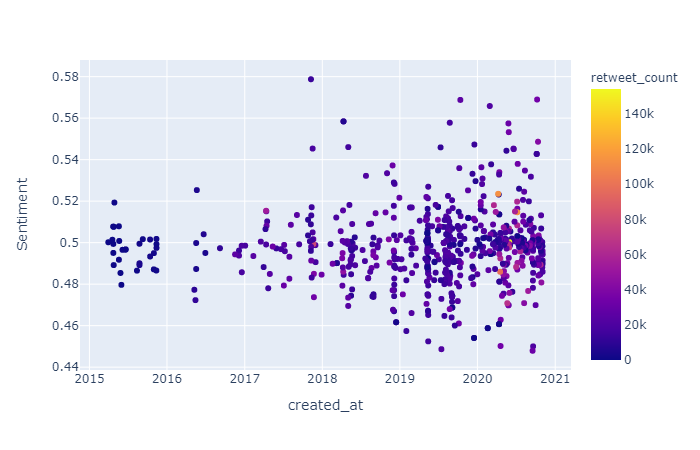

In [24]:
fig = px.scatter(china, x ='created_at', y= 'Sentiment', color='retweet_count',
                hover_data=['text'])
fig.show(renderer="png")